In [1]:
from dedalus_sphere import jacobi as Jacobi

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


### The Orthogonal Basis
$$ \psi_{m,l,k}(s,\phi,\eta) = e^{i m \phi} P_l(\eta) s^m (1-s^2)^\frac{l}{2} P_k^{l+\frac{1}{2},m}(2s^2 -1)$$

In [2]:
ns, neta = 500, 501
s, eta = np.linspace(0,1,ns), np.linspace(-1,1,neta)

In [3]:
def plotfield(s, eta, f, fig=None, ax=None):
    ss = np.reshape(s,(1,len(s)))
    ee = np.reshape(eta,(len(eta),1))
    zz = np.sqrt(1-ss**2)*ee

    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=(4.25,6))
    im = ax.pcolormesh(ss, zz, f, cmap='RdBu')
    fig.colorbar(im, ax=ax)
    ax.set_xlabel('s')
    ax.set_ylabel('z')
    ax.set_aspect('equal', adjustable='box')
    fig.set_tight_layout(True)


def expansion(F, T, Q):
    return T @ (Q @ F).T

def plot_basis(basis, s, eta):
    Nmax = len(basis)
    ncols = 3
    nrows = (Nmax+ncols-1)//ncols
    fig, plot_axes = plt.subplots(nrows,ncols,figsize=(11,4*nrows))
    row, col = 0, 0
    for k in range(Nmax):
        plotfield(s, eta, basis[k], fig, plot_axes[row][col])
        col += 1
        if col == ncols:
            col = 0
            row += 1

def plot_radial(basis, s, eta, etavalues):
    if np.isscalar(etavalues): etavalues = [etavalues]
    neta = len(etavalues)

    fig, plot_axes = plt.subplots(1,neta,figsize=(4*neta,4))
    if neta == 1: plot_axes = [plot_axes]
    for i in range(neta):
        etaindex = np.argmin(np.abs(eta-etavalues[i]))
        for k in range(len(basis)):
            plot_axes[i].plot(s,basis[k][etaindex,:])
        plot_axes[i].grid()
        plot_axes[i].set_title('ell = {}, η = {}'.format(ell, eta[etaindex]))
        plot_axes[i].set_xlabel('s')
        plot_axes[i].grid(True)


In [4]:
def psi(Nmax, m, ell, s, eta):
    ns, neta = len(s), len(eta)
    a, b = 0, 0
    z = 2*s**2 - 1

    Peta = np.reshape(Jacobi.polynomials(ell+1,a,b,eta)[-1,:], (neta,1))
    Ps = Jacobi.polynomials(Nmax,ell+1/2,m,z)
    ss = np.reshape(s, (1,ns))
    return [Peta * ss**m * (1-ss**2)**(ell/2) * Ps[k,:] for k in range(Nmax)]


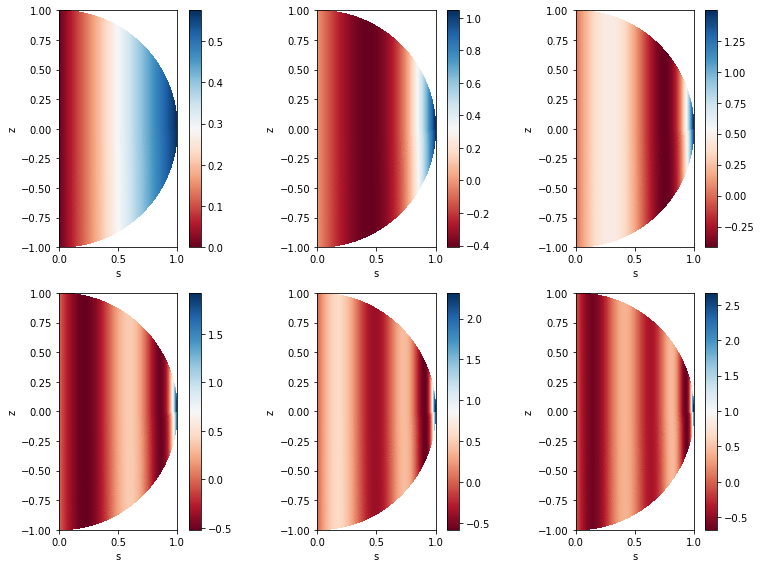

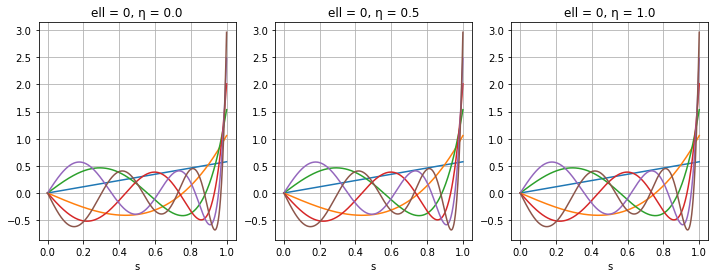

In [5]:
Nmax, m, ell = 6, 1, 0
basis = psi(Nmax, m, ell, s, eta)
plot_basis(basis, s, eta)

plot_radial(basis, s, eta, [0.0, 0.5, 1.0])

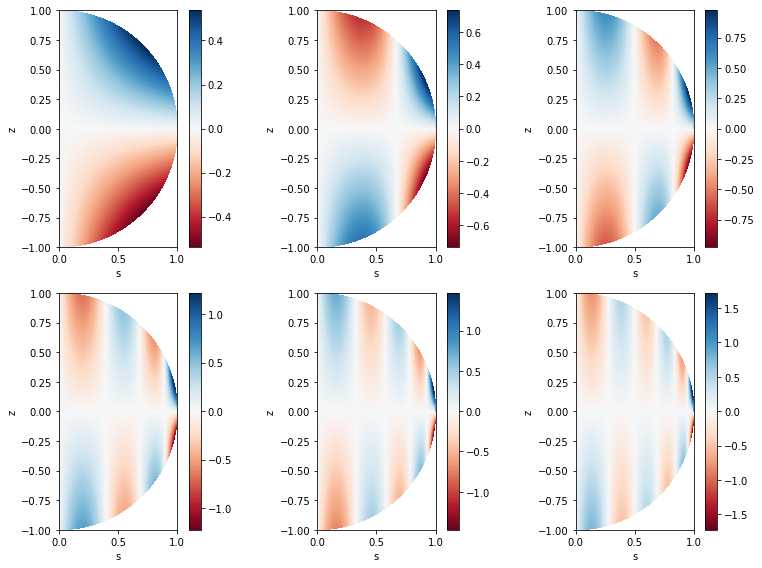

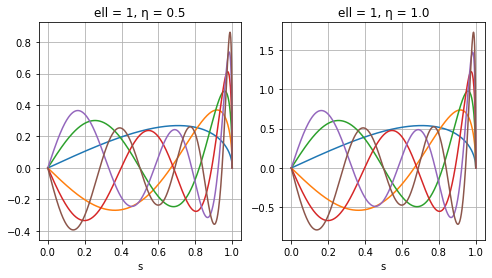

In [6]:
Nmax, m, ell = 6, 1, 1
basis = psi(Nmax, m, ell, s, eta)
plot_basis(basis, s, eta)

plot_radial(basis, s, eta, [0.5, 1.0])

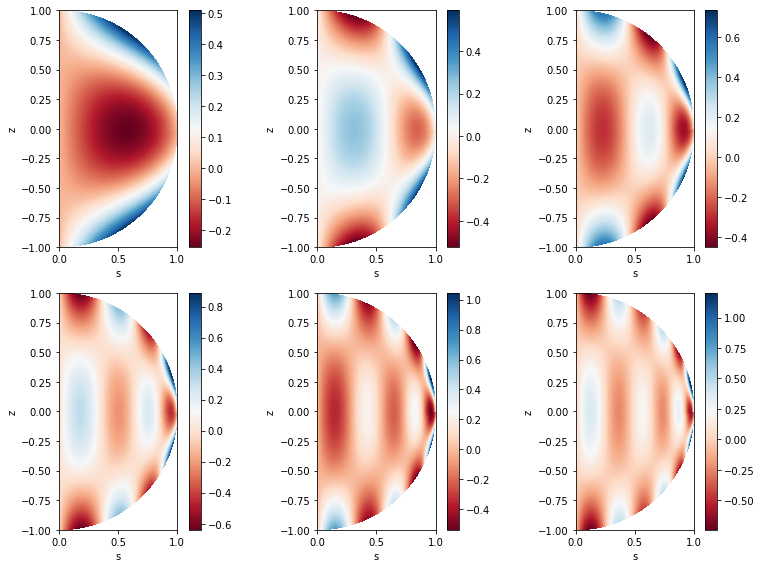

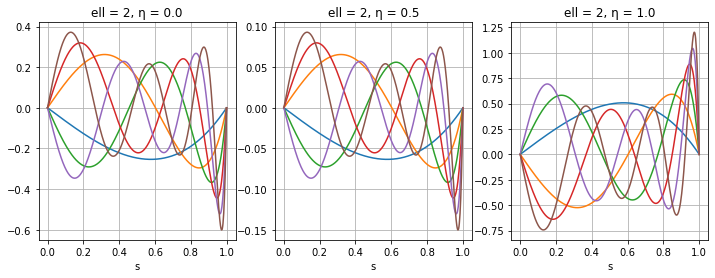

In [7]:
Nmax, m, ell = 6, 1, 2
basis = psi(Nmax, m, ell, s, eta)
plot_basis(basis, s, eta)

plot_radial(basis, s, eta, [0., 0.5, 1.0])

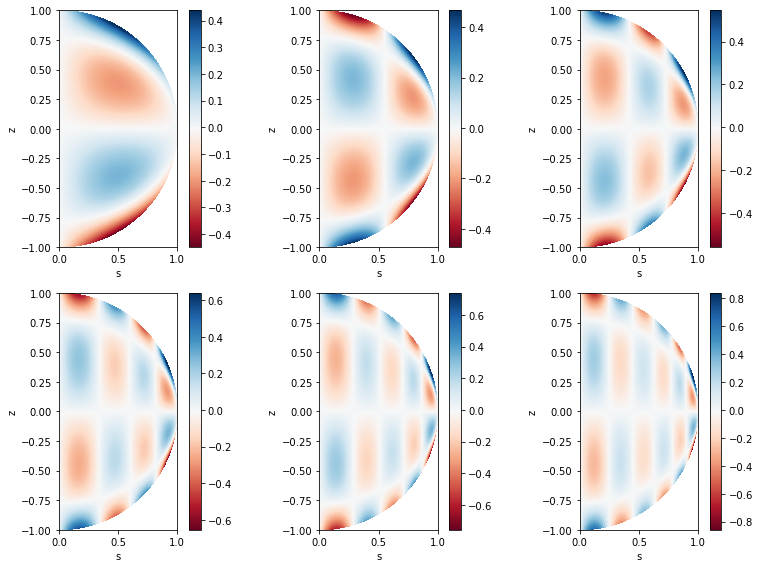

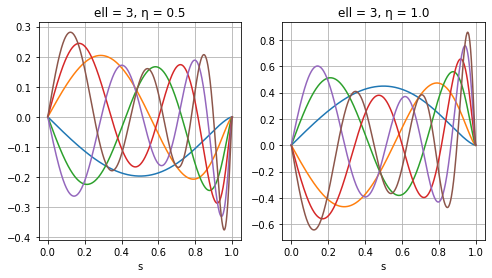

In [8]:
Nmax, m, ell = 6, 1, 3
basis = psi(Nmax, m, ell, s, eta)
plot_basis(basis, s, eta)

plot_radial(basis, s, eta, [0.5, 1.0])

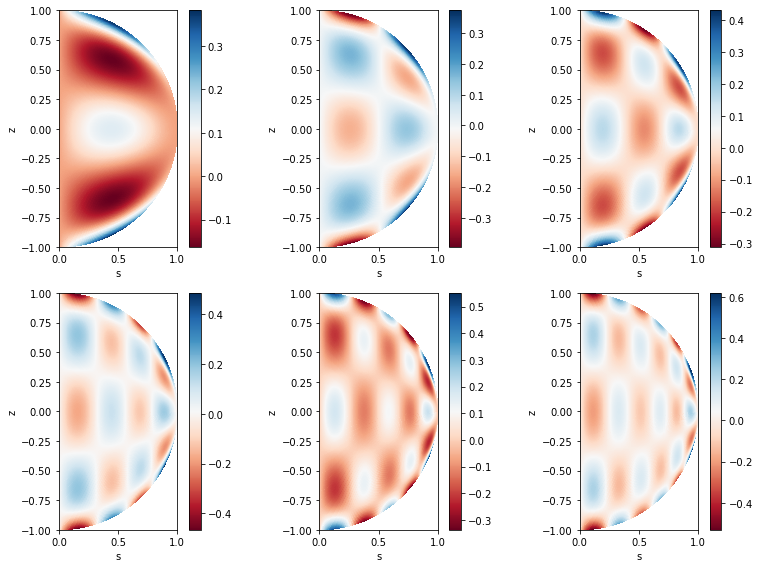

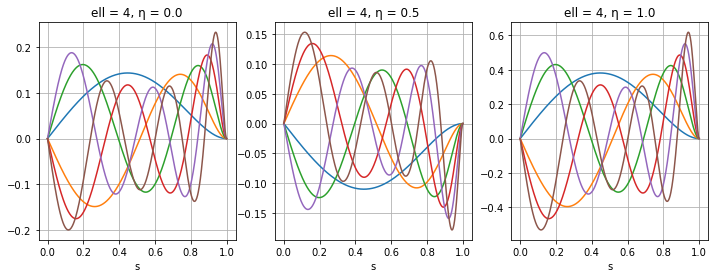

In [9]:
Nmax, m, ell = 6, 1, 4
basis = psi(Nmax, m, ell, s, eta)
plot_basis(basis, s, eta)

plot_radial(basis, s, eta, [0., 0.5, 1.0])

### The Gradient

For a scalar field given by
$$ \psi_{m,l,k}(s,\phi,\eta) = e^{i m \phi} P_l(\eta) s^m (1-s^2)^\frac{l}{2} P_k^{l+\frac{1}{2},m}(2s^2 -1)$$
the gradient is found to be
\begin{align}
\left( e_s - i e_\phi \right) \cdot \psi_{m,l,k} &= (1+t)^{\frac{m-1}{2}} (1-t)^{\frac{l-2}{2}} \left[ (1+t) P_k^{(l+\frac{1}{2},m)}(t) \left( (l+1)P_l(\eta) + \eta P_l'(\eta) \right) - 2 P_l(\eta) D^\dagger P_k^{(l+\frac{1}{2}, m)} \right] \\
\left( e_s + i e_\phi \right) \cdot \psi_{m,l,k} &= (1+t)^{\frac{m+1}{2}} (1-t)^{\frac{l-2}{2}} \left[ \hphantom{(1+t)} P_k^{(l+\frac{1}{2},m)}(t) \left( (l+1)P_l(\eta) + \eta P_l'(\eta) \right) - 2 P_l(\eta) C^\dagger P_k^{(l+\frac{1}{2},m)}(t) \right] \\
e_z \cdot \psi_{m,l,k} &= (1+t)^{\frac{m}{2}} (1-t)^{\frac{l-1}{2}} P_k^{(l+\frac{1}{2}, m)}(t) P_l'(\eta)
\end{align}



We then define the operators
\begin{align}
L &= (l+1) + Z D^{+} \\
G^{-} &= \left( B^{\dagger} \otimes L \right) - 2 \left( A^{+} D^{\dagger} \otimes A^{+} B^{+} \right) \\
G^{+} &= \left( B^{+} \otimes L \right) - 2 \left( A^{+} C^{\dagger} \otimes A^{+} B^{+} \right)
\end{align}
where we have
\begin{align}
Z F &\leftrightarrow z f(z) \\
D^{+} F &\leftrightarrow \frac{d}{dz} f(z) \\
D^{\dagger} P_n^{(a,b)} &\leftrightarrow \left[ (1+z) a - (1-z) b - (1-z^2) \frac{d}{dz} \right] P_n^{(a,b)}(z) \\
C^{\dagger} P_n^{(a,b)} &\leftrightarrow \left[ a - (1-z) \frac{d}{dz} \right] P_n^{(a,b)} \\
B^{\dagger} P_n^{(a,b)} &\leftrightarrow \left( 1 + z \right) P_n^{(a,b)} \\
A^{+} &: P^{(a, b)} \to P^{(a+1, b)} \\
B^{+} &: P^{(a, b)} \to P^{(a, b+1)} \\
\end{align}